# Fitbit Fitness Checker Data Analysis

## Case Study : How can a Wellness Technology Company Play It Smart?

*This is the case study project for the Google Data Analytics Professional Certificate.

### Scenario and the task

We are under a scenario to be working on the marketing analyst team as a junior data analyst at Bellabeat. Bellabeat is a high tech manufacturer of health-focused products for wormen. Our cofounder and Chief Creative Officer, Urška Sršen, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. The task is to analyze smart device usuage data of non-Bellabeat products to help guide the executive team marketing strategy for the company.

### About Bellabeat:

Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.
By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their website. The company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google Display Network to support campaigns around key marketing dates.
Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.

### Bellabeat's Products

* **Bellabeat app**: The Bellabeat app provides users with health data related to their activity, sleep, stress,
menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and
make healthy decisions. The Bellabeat app connects to their line of smart wellness products.
○ Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects
to the Bellabeat app to track activity, sleep, and stress.
* **Time**: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user
activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your
daily wellness.
* **Spring**: This is a water bottle that tracks daily water intake using smart technology to ensure that you are
appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.
* **Bellabeat** membership: Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

# Ask

## Business Task

We are instructed to analyse smart device usuage data in order to gain insight into how cnsumers use smart devices other than company's product. After the data analysis process, our stakeholders would like us to give high-level recommendation into company's marketing strategy.

## Stakeholders

* **Urška Sršen**: Bellabeat’s cofounder and Chief Creative Officer
* **Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* **Bellabeat marketing analytics team**: A team of data analysts responsible for collecting, analyzing, and
reporting data that helps guide Bellabeat’s marketing strategy.

# Prepare:

Our stakeholder, Urška Sršen, encourages us to use public data that explores smart device users’ daily habits. We will use a specific data set: __[FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit)__(CC0: Public Domain, dataset made available through __[Mobius](https://www.kaggle.com/arashnic)__): This Kaggle data set
contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

We then start our process to prepare for the analysis process. Here is all the library we will use in this project.

In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import ticker
from scipy.optimize import curve_fit
import re
import os
import datetime

All the data is stored into a `Fitabase Data 4.12.16-5.12.16` folder and there are totally 18 *csv* files inside. We create two lists for it. First of it `fitbit_data_list` is used to store all the absoulte path for the *csv* file and the other one `fitbit_tablename_list` is used to store for the table name same as file name but without extension.

In [2]:
path = '/Users/michaelfong/Desktop/Case Study 2/Fitabase Data 4.12.16-5.12.16'
# Get the list of all data file (with extension) and table name (without extension) inside the Fitbit data folder
fitbit_data_list=[]
fitbit_tablename_list=[]
for infile in os.listdir(path):
    fitbit_data_list.append(os.path.abspath(path)+"/"+infile)
    fitbit_tablename_list.append(os.path.splitext(infile)[0])

Now, we list out all file paths to ensure the integrity of our path list and the table name list:

In [3]:
fitbit_data_list

['/Users/michaelfong/Desktop/Case Study 2/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv',
 '/Users/michaelfong/Desktop/Case Study 2/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv',
 '/Users/michaelfong/Desktop/Case Study 2/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv',
 '/Users/michaelfong/Desktop/Case Study 2/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv',
 '/Users/michaelfong/Desktop/Case Study 2/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv',
 '/Users/michaelfong/Desktop/Case Study 2/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv',
 '/Users/michaelfong/Desktop/Case Study 2/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv',
 '/Users/michaelfong/Desktop/Case Study 2/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv',
 '/Users/michaelfong/Desktop/Case Study 2/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv',
 '/Users/michaelfong/Desktop/Case Study 2/Fitabase Data 4.12.16-5.12.16/hourlyCalories_

In [4]:
print(fitbit_tablename_list)
print(f"There are total {len(fitbit_tablename_list)} files inserted.")

['minuteIntensitiesWide_merged', 'dailyActivity_merged', 'sleepDay_merged', 'heartrate_seconds_merged', 'minuteIntensitiesNarrow_merged', 'minuteMETsNarrow_merged', 'hourlySteps_merged', 'hourlyIntensities_merged', 'dailyCalories_merged', 'hourlyCalories_merged', 'minuteSleep_merged', 'minuteCaloriesNarrow_merged', 'dailySteps_merged', 'minuteCaloriesWide_merged', 'minuteStepsNarrow_merged', 'minuteStepsWide_merged', 'weightLogInfo_merged', 'dailyIntensities_merged']
There are total 18 files inserted.


We can see that all 18 files inside the folder had been created and added to the two lists. Then, we can start to process the data by creating a database.

## Process

We use the `sqlite3` module as an interface for SQLite in Python to create a database in order to clean and transform the data. Then we can easily use SQL queries to work through the data and analysis.

### Creat a database

First, we will create a database with a connection and starting a cursor in the desired database. Then, we insert all 18 *csv* files from the list above into the database with the filename of the *csv* file(without extension) by the pandas library as follow:

In [5]:
def create_sqlite_connection(path):
    connection = None
    try:
        connection = sql.connect(path)
        print("Successfully connect to SQLite Database.")
    except Error as e:
        print(f"The error '{e}' occurred")
    return connection

In [6]:
con = create_sqlite_connection("fitbitdata.db")
cur = con.cursor()

Successfully connect to SQLite Database.


In [7]:
# use pd.read_csv to read the file from the path and use to_sql to insert the table in the database
for i in range(len(fitbit_data_list)):
    df = pd.read_csv(fitbit_data_list[i])
    df.to_sql(fitbit_tablename_list[i], con, if_exists='append', index=False)

We can now run a SQL query to list all the tables in our database to ensure that all tables are inserted as follow:

In [8]:
query='''
    SELECT 
        name 
    FROM 
        sqlite_master 
    WHERE 
        type='table';
'''
cur.execute(query)
tables = cur.fetchall()

In [9]:
tables

[('minuteIntensitiesWide_merged',),
 ('dailyActivity_merged',),
 ('sleepDay_merged',),
 ('heartrate_seconds_merged',),
 ('minuteIntensitiesNarrow_merged',),
 ('minuteMETsNarrow_merged',),
 ('hourlySteps_merged',),
 ('hourlyIntensities_merged',),
 ('dailyCalories_merged',),
 ('hourlyCalories_merged',),
 ('minuteSleep_merged',),
 ('minuteCaloriesNarrow_merged',),
 ('dailySteps_merged',),
 ('minuteCaloriesWide_merged',),
 ('minuteStepsNarrow_merged',),
 ('minuteStepsWide_merged',),
 ('weightLogInfo_merged',),
 ('dailyIntensities_merged',)]

### Check for information and redundancy

Now we have a list of all tables. Then we check that which tables with **daily** as we need to perform the analysis based on those tables.

In [10]:
for table in fitbit_tablename_list:
    if re.search('daily', table):
        print(table)

dailyActivity_merged
dailyCalories_merged
dailySteps_merged
dailyIntensities_merged


Let's take a closer look for these four **daily** tables.

In [11]:
query='''
    SELECT *
    FROM dailyActivity_merged
'''

dailyactivity_df = pd.read_sql(query, con)

In [12]:
dailyactivity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [13]:
dailyactivity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [14]:
query='''
    SELECT 
        *
    FROM 
        dailyIntensities_merged
'''

dailyintensities_df = pd.read_sql(query, con)
dailyintensities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB


In [15]:
query='''
    SELECT 
        *
    FROM 
        dailyCalories_merged
'''

dailycalories_df = pd.read_sql(query, con)
dailycalories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [16]:
query='''
    SELECT 
        *
    FROM 
        dailySteps_merged
'''

dailysteps_df = pd.read_sql(query, con)
dailysteps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


From the above summary, we find out that all four tables with 940 rows and have the same `Id` Column. Let's check the redundancy of all tables by execute `EXCEPT` statement for common columns. However, there is a different in some names of columns like `ActivityDate` in `dailyActivity_merged` tables is different from the `ActivityDay` for the other three tables. Therefore, we change the table column name for that specifc column first.

In [17]:
query = '''
    ALTER TABLE dailyActivity_merged
    RENAME COLUMN ActivityDate to ActivityDay;
'''
cur.execute(query)
result = cur.fetchall()
if result is not tuple:
    print ("Change success!")
else:
    print (result) 

Change success!


In [18]:
query='''
    SELECT 
        *
    FROM 
        dailyActivity_merged
'''

dailyactivity_df = pd.read_sql(query, con)
dailyactivity_df.columns.values

array(['Id', 'ActivityDay', 'TotalSteps', 'TotalDistance',
       'TrackerDistance', 'LoggedActivitiesDistance',
       'VeryActiveDistance', 'ModeratelyActiveDistance',
       'LightActiveDistance', 'SedentaryActiveDistance',
       'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
       'SedentaryMinutes', 'Calories'], dtype=object)

In [19]:
query = '''
    ALTER TABLE dailySteps_merged
    RENAME COLUMN StepTotal to TotalSteps;
'''
cur.execute(query)
result = cur.fetchall()
if result is not tuple:
    print ("Change success!")
else:
    print (result) 

Change success!


In [20]:
query='''
    SELECT 
        *
    FROM 
        dailySteps_merged
'''

dailysteps_df = pd.read_sql(query, con)
dailysteps_df.columns.values

array(['Id', 'ActivityDay', 'TotalSteps'], dtype=object)

Now we can have a function to check the redundancy of the other three tables with the `dailyActivity_merged` tables.

In [21]:
def check_redundancy (tuple):
    if not tuple:
        print ("The choosen columns are redundant.")
    else:
        print ("There are different in the choosen columns!")
        print (tuple)

In [22]:
query ='''
    SELECT
        Id,
        ActivityDay,
        SedentaryMinutes,
        LightlyActiveMinutes,
        FairlyActiveMinutes, 
        VeryActiveMinutes, 
        SedentaryActiveDistance,
        LightActiveDistance,
        ModeratelyActiveDistance,
        VeryActiveDistance
    FROM
        dailyActivity_merged
    EXCEPT
    SELECT
        Id,
        ActivityDay,
        SedentaryMinutes,
        LightlyActiveMinutes,
        FairlyActiveMinutes, 
        VeryActiveMinutes, 
        SedentaryActiveDistance,
        LightActiveDistance,
        ModeratelyActiveDistance,
        VeryActiveDistance
    FROM
        dailyIntensities_merged
'''
cur.execute(query)
check_redundancy(cur.fetchall())

The choosen columns are redundant.


In [23]:
query ='''
    SELECT
        Id,
        ActivityDay,
        Calories
    FROM
        dailyActivity_merged
    EXCEPT
    SELECT
        Id,
        ActivityDay,
        Calories
    FROM
        dailyCalories_merged
'''
cur.execute(query)
check_redundancy(cur.fetchall())

The choosen columns are redundant.


In [24]:
query ='''
    SELECT
        Id,
        ActivityDay,
        TotalSteps
    FROM
        dailyActivity_merged
    EXCEPT
    SELECT
        Id,
        ActivityDay,
        TotalSteps
    FROM
        dailySteps_merged
'''
cur.execute(query)
check_redundancy(cur.fetchall())

The choosen columns are redundant.


Now, we can see that all information are included in `dailyActivity_merged` table. We will only use the `dailyActivity_merged` table in the following analysis process.

### Updating table date format for analysis

Then we need to update the `ActivityDay` column in `dailyActivity_merged` table to match the standard `YYYY-MM-DD` format in order to use the `STFTIME` function in `sqlite3` library for analysis. An order to use complicated regular expression method with SQL query, we will use Python programming to pefrom the transformation process. We first collect the column of the `ActivityDay` data according to there `ROWID` into a python list called `date_list` below. The we can perform the transformation by `datetime` library in Python easily. 

In [25]:
query = '''
    SELECT
        ActivityDay, 
        ROWID
    FROM
        dailyActivity_merged
'''
df = pd.read_sql(query, con)
date_list = df.values.tolist()
# Avoid to show all the result in list, just show the first 10 to check
print(date_list[0:10])

[['4/12/2016', 1], ['4/13/2016', 2], ['4/14/2016', 3], ['4/15/2016', 4], ['4/16/2016', 5], ['4/17/2016', 6], ['4/18/2016', 7], ['4/19/2016', 8], ['4/20/2016', 9], ['4/21/2016', 10]]


In [26]:
# Create a function to easily update the date format from MM/DD/YYYY to the standard YYYY-MM_DD for analysis.
def updated_date_format(date_list):
    for i in range(len(date_list)):
        d = datetime.datetime.strptime(date_list[i][0],"%m/%d/%Y")
        date_list[i][0]=datetime.date.strftime(d,"%Y-%m-%d")
    return date_list

In [27]:
updated_date_list = updated_date_format(date_list)
# Avoid to show all the result in list, just show the first 10 to check
print(updated_date_list[0:10])

[['2016-04-12', 1], ['2016-04-13', 2], ['2016-04-14', 3], ['2016-04-15', 4], ['2016-04-16', 5], ['2016-04-17', 6], ['2016-04-18', 7], ['2016-04-19', 8], ['2016-04-20', 9], ['2016-04-21', 10]]


Counter check if we update the date successfully into our dataframe.

In [28]:
for i in range(len(updated_date_list)):
    dailyactivity_df.loc[i, ['ActivityDay']]=updated_date_list[i][0]
dailyactivity_df.head()

,Id,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


After updating the date format in the date_list, we can then update the column of `ActivityDay` with our updated format according to the `ROWID` in the `date_list` to the `dailyActivity_merged` table as follow:

In [29]:
def update_dailyActivity_ActivityDay(record_list):
    try:
        sql_update_query='''
            UPDATE 
                dailyActivity_merged
            SET 
                ActivityDay = ?
            WHERE 
                ROWID = ?
        '''
        cur.executemany(sql_update_query, record_list)
        con.commit()
        print("Total", cur.rowcount, "Records updated successfully.")
    except sql.Error as error:
        print("Failed to update multiple records of sqlite table", error)

In [30]:
update_dailyActivity_ActivityDay(updated_date_list)

Total 940 Records updated successfully.


All the records are updated and run a SQL query to check if the date is in proper format now:

In [31]:
query='''
    SELECT 
        *
    FROM 
        dailyActivity_merged
'''

dailyactivity_df = pd.read_sql(query, con)
dailyactivity_df.head()

,Id,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


As we have update the date format into standard format of SQLite, we can now use the function `STRFTIME` to extract information on the day, month, year and weekdays as follow:

(Please note that integer **0-6** is mapping withing **Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday** no matter in `datetime` of Python or `STRFTIME` in SQLite)

In [32]:
query = """
SELECT
    *,
    STRFTIME('%d',ActivityDay) AS Day,
    STRFTIME('%m',ActivityDay) AS Month,
    STRFTIME('%Y',ActivityDay) AS Year,
    STRFTIME('%w',ActivityDay) AS Weekday
FROM dailyActivity_merged;
"""

cleaned_dailyActivity_df = pd.read_sql(query, con)
cleaned_dailyActivity_df.head()

,Id,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day,Month,Year,Weekday
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,12,04,2016,2
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,13,04,2016,3
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,14,04,2016,4
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,15,04,2016,5
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,16,04,2016,6


After changing the date, we check if there is any `NA` or `NULL` values in the dateActivity table.

In [33]:
len(df[cleaned_dailyActivity_df.isnull().any(axis=1)])

0

Then we check if there is any row with 0 calories and we will clean it. 

In [34]:
query = '''
    SELECT
        *
    FROM 
        dailyActivity_merged
    WHERE
        Calories = 0;
'''

df = pd.read_sql(query, con)
df

,Id,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-05-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
1,6290855005,2016-05-10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
2,8253242879,2016-04-30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
3,8583815059,2016-05-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0


In [35]:
try:
    query ='''
        DELETE FROM
            dailyActivity_merged
        WHERE 
            Calories = 0;
    '''
    cur.execute(query)
    con.commit()
    print("Total", cur.rowcount, "Records deleted successfully.")
except sql.Error as error:
    print("Failed to delete rows of sqlite table", error)

Total 4 Records deleted successfully.


In [36]:
query = """
SELECT
    *,
    STRFTIME('%d',ActivityDay) AS Day,
    STRFTIME('%m',ActivityDay) AS Month,
    STRFTIME('%Y',ActivityDay) AS Year,
    STRFTIME('%w',ActivityDay) AS Weekday
FROM dailyActivity_merged;
"""

cleaned_dailyActivity_df = pd.read_sql(query, con)
cleaned_dailyActivity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        936 non-null    int64  
 1   ActivityDay               936 non-null    object 
 2   TotalSteps                936 non-null    int64  
 3   TotalDistance             936 non-null    float64
 4   TrackerDistance           936 non-null    float64
 5   LoggedActivitiesDistance  936 non-null    float64
 6   VeryActiveDistance        936 non-null    float64
 7   ModeratelyActiveDistance  936 non-null    float64
 8   LightActiveDistance       936 non-null    float64
 9   SedentaryActiveDistance   936 non-null    float64
 10  VeryActiveMinutes         936 non-null    int64  
 11  FairlyActiveMinutes       936 non-null    int64  
 12  LightlyActiveMinutes      936 non-null    int64  
 13  SedentaryMinutes          936 non-null    int64  
 14  Calories  

Finally, 936 rows of data left and we finish the data cleaning for the `dataActivity_merged` table.

Let's continue to our cleaning process to the `sleepDay_merged` table as we are going to look for the data inside.

In [37]:
query = '''
    SELECT
        *
    FROM
        sleepDay_merged;
'''
sleepday_df = pd.read_sql(query, con)
sleepday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [38]:
sleepday_df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


We can observe that the date format is also not in standard. So, we perform the changing work same as above.

In [39]:
query = '''
    SELECT
        SleepDay, 
        ROWID
    FROM
        sleepDay_merged
'''
df = pd.read_sql(query, con)
datetime_list = df.values.tolist()
# Avoid to show all the result in list, just show the first 10 to check
print(datetime_list[0:10])

[['4/12/2016 12:00:00 AM', 1], ['4/13/2016 12:00:00 AM', 2], ['4/15/2016 12:00:00 AM', 3], ['4/16/2016 12:00:00 AM', 4], ['4/17/2016 12:00:00 AM', 5], ['4/19/2016 12:00:00 AM', 6], ['4/20/2016 12:00:00 AM', 7], ['4/21/2016 12:00:00 AM', 8], ['4/23/2016 12:00:00 AM', 9], ['4/24/2016 12:00:00 AM', 10]]


In [40]:
def updated_datetime_format(datetime_list):
    for i in range(len(datetime_list)):
        d = datetime.datetime.strptime(datetime_list[i][0],"%m/%d/%Y %H:%M:%S %p")
        datetime_list[i][0]=datetime.date.strftime(d,"%Y-%m-%d")
    return datetime_list

In [41]:
updated_datetime_list = updated_datetime_format(datetime_list)
# Avoid to show all the result in list, just show the first 10 to check
print(updated_datetime_list[0:10])

[['2016-04-12', 1], ['2016-04-13', 2], ['2016-04-15', 3], ['2016-04-16', 4], ['2016-04-17', 5], ['2016-04-19', 6], ['2016-04-20', 7], ['2016-04-21', 8], ['2016-04-23', 9], ['2016-04-24', 10]]


In [42]:
def update_sleepDay_SleepDay(record_list):
    try:
        sql_update_query='''
            UPDATE 
                sleepDay_merged
            SET 
                SleepDay = ?
            WHERE 
                ROWID = ?
        '''
        cur.executemany(sql_update_query, record_list)
        con.commit()
        print("Total", cur.rowcount, "Records updated successfully")
    except sql.Error as error:
        print("Failed to update multiple records of sqlite table", error)

In [43]:
update_sleepDay_SleepDay(updated_datetime_list)

Total 413 Records updated successfully


In [44]:
query='''
    SELECT 
        *
    FROM 
        sleepDay_merged
'''

sleepday_df = pd.read_sql(query, con)
sleepday_df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [45]:
query = """
SELECT
    *,
    STRFTIME('%d',SleepDay) AS Day,
    STRFTIME('%m',SleepDay) AS Month,
    STRFTIME('%Y',SleepDay) AS Year,
    STRFTIME('%w',SleepDay) AS Weekday
FROM sleepDay_merged;
"""

cleaned_sleepday_df = pd.read_sql(query, con)
cleaned_sleepday_df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day,Month,Year,Weekday
0,1503960366,2016-04-12,1,327,346,12,04,2016,2
1,1503960366,2016-04-13,2,384,407,13,04,2016,3
2,1503960366,2016-04-15,1,412,442,15,04,2016,5
3,1503960366,2016-04-16,2,340,367,16,04,2016,6
4,1503960366,2016-04-17,1,700,712,17,04,2016,0


After changing the date, we check if there is `Null` or `NA` row and any 0 values for the sleep data as follow.

In [46]:
len(df[cleaned_sleepday_df.isnull().any(axis=1)])

0

In [47]:
query='''
    SELECT 
        *
    FROM 
        sleepDay_merged
    WHERE
        TotalSleepRecords = 0 OR TotalMinutesAsleep = 0 OR TotalTimeInBed = 0
'''

df = pd.read_sql(query, con)
len(df)

0

Finally we finish the data clearing and data manipulation process.

# Analyze

Now we can start to analyze the data. We try to get the total number of users and average data from the `dailyActivity_merged` and `sleep_merged` table.

In [48]:
query = '''
    SELECT
        COUNT(DISTINCT Id) AS Number_of_Users,
        ROUND(AVG(TotalSteps),2) AS Avg_steps,
        ROUND(AVG(TotalDistance),2) AS Avg_distance,
        ROUND(AVG(VeryActiveDistance),2) AS Avg_very_active_distance,
        ROUND(AVG(VeryActiveMinutes),2) AS Avg_very_active_mins,
        ROUND(AVG(SedentaryMinutes),2) AS Avg_Sedentary_hours,
        ROUND(AVG(Calories),2) AS Avg_calories
    FROM
        dailyActivity_merged;
'''

pd.read_sql(query, con)

,Number_of_Users,Avg_steps,Avg_distance,Avg_very_active_distance,Avg_very_active_mins,Avg_Sedentary_hours,Avg_calories
0,33,7670.55,5.51,1.51,21.26,989.29,2313.45


We can observe that there are totally 33 differenct users in this data. The average daily total steps are 7670 with average daily distance 5.51km. The very active minutes are 21.26 minutes only compare with 16 average sedentary hours.

In [49]:
query = '''
    SELECT
        COUNT(DISTINCT ID) AS Number_of_Users,
        ROUND(AVG(TotalMinutesAsleep/60),2) AS Avg_sleep_hours,
        ROUND(AVG(TotalTimeinBed/60),2) AS Avg_time_in_bed,
        ROUND(AVG(TotalTimeinBed-TotalMinutesAsleep),2) AS Avg_time_awaken_in_bed_mins
    FROM
        sleepDay_merged;
'''

pd.read_sql(query, con)

,Number_of_Users,Avg_sleep_hours,Avg_time_in_bed,Avg_time_awaken_in_bed_mins
0,24,6.48,7.2,39.17


For the sleep data table, 24 different users take their log here. The average sleep time is 6.48 hours and the average awaken time in bed is around 40 minutes.

We also get average data according to weekday from `dailyActivity_merged` and `sleepDay_merged`as below:

In [50]:
query = """
    SELECT 
        STRFTIME('%w', ActivityDay) AS weekday,
        ROUND(AVG(TotalSteps),2) AS avg_steps,
        ROUND(AVG(TotalDistance),2) AS avg_distance,
        ROUND(AVG(Calories),2) AS avg_calories,
        ROUND(AVG(VeryActiveMinutes),2) AS avg_very_active_mins
    FROM 
        dailyActivity_merged
    GROUP BY 
        STRFTIME('%w', ActivityDay);
"""

avg_activity = pd.read_sql(query, con)
avg_activity

,weekday,avg_steps,avg_distance,avg_calories,avg_very_active_mins
0,0,6933.23,5.03,2263.00,19.98
1,1,7780.87,5.55,2324.21,23.11
2,2,8178.81,5.87,2371.62,23.11
3,3,7559.37,5.49,2302.62,20.78
4,4,7507.99,5.39,2229.91,19.68
5,5,7448.23,5.31,2331.79,20.06
6,6,8219.26,5.90,2374.11,22.10


In [51]:
query = """
    SELECT 
        STRFTIME('%w', SleepDay) AS weekday,
        ROUND(AVG(TotalMinutesAsleep),2) AS Avg_sleep_hours,
        ROUND(AVG(TotalTimeinBed),2) AS Avg_time_in_bed,
        ROUND(AVG(TotalTimeinBed-TotalMinutesAsleep),2) AS Avg_time_awaken_in_bed
    FROM 
        sleepDay_merged
    GROUP BY 
        STRFTIME('%w', SleepDay);
"""

avg_sleep = pd.read_sql(query, con)
avg_sleep

,weekday,Avg_sleep_hours,Avg_time_in_bed,Avg_time_awaken_in_bed
0,0,452.75,503.51,50.76
1,1,418.83,456.17,37.34
2,2,404.54,443.29,38.75
3,3,434.68,470.03,35.35
4,4,402.37,435.80,33.43
5,5,405.42,445.05,39.63
6,6,420.81,461.28,40.47


We perform some data visualization to perform the analysis process below

### Visualizations for Daily Activity

In order to share the result of the plot in a better way, we make a color_map funciton to assign the color map for the histogram graph as below:

In [52]:
# type standard for colormaps type name
# ratio stand for ratio diveded for adjustment to avoid unvisible color
# reverse: True for reverse colormap
def color_map(type, ratio, reverse):
    cmp = plt.cm.get_cmap(type)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)
    if reverse == True:
        col = 1- (col/ratio)
    else:
        col = col/ratio
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cmp(c)) 

We then plot the follow four bar chart to observe the pattern of activity according to weekdays:
* Average Steps
* Average Distance
* Average Calories
* Average Very Active Minutes

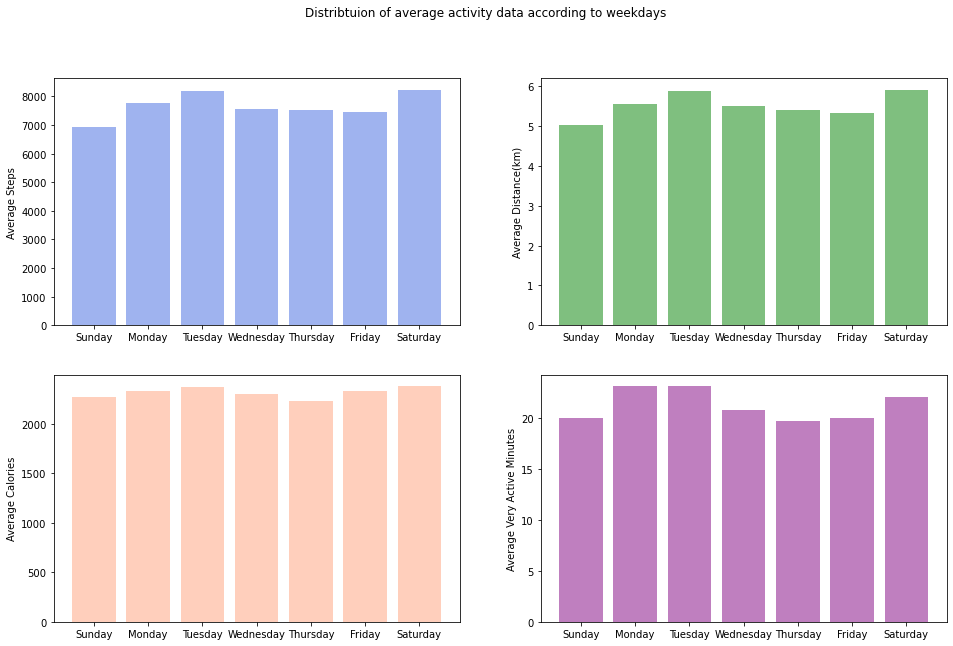

In [53]:
weekday = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

plt.figure(figsize = (16,10))

plt.subplot(221)
plt.bar(weekday, avg_activity.avg_steps, align='center',alpha=0.5, color = 'royalblue')
plt.tight_layout
plt.ylabel('Average Steps')

plt.subplot(222)
plt.bar(weekday, avg_activity.avg_distance, align='center',alpha=0.5, color = 'green')
plt.tight_layout
plt.ylabel('Average Distance(km)')

plt.subplot(223)
plt.bar(weekday, avg_activity.avg_calories, align='center',alpha=0.5, color = 'lightsalmon')
plt.tight_layout
plt.ylabel('Average Calories')

plt.subplot(224)
plt.bar(weekday, avg_activity.avg_very_active_mins, align='center',alpha=0.5, color = 'purple')
plt.tight_layout
plt.ylabel('Average Very Active Minutes')

plt.suptitle('Distribtuion of average activity data according to weekdays')
plt.show()

We can observe that all the data in Saturday had the highest value. 

We can plot scatter plot with a curved trend line to observe the relationship between **Calories** and the activities.

As we don't know the exact relationship between the datas, we decieded to build a function with polynomial equation to present the curved trend line. Then we use the `curve_fit` funciton in `scipy.optimize`library to plot the curved line.

In [54]:
def function(x, a, b, c, d, e):
    return a + (b * x) + (c * x**2) + (d * x**3) + (e * x**4)

y = 1651.149 + 0.121 x + -0.000 x^2 + 0.000x^3 + -0.000x^4


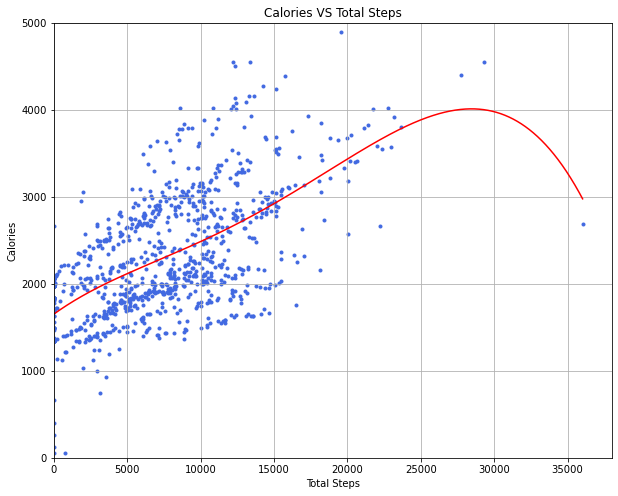

In [55]:
x = cleaned_dailyActivity_df.TotalSteps
y = cleaned_dailyActivity_df.Calories

plt.figure(figsize = (10,8))
plt.scatter(x, y, marker='.', color ='royalblue')

popt, pcov = curve_fit(function, x, y)
a, b, c, d, e = popt
print ("y = %.3f + %.3f x + %.3f x^2 + %.3fx^3 + %.3fx^4" % (a, b, c, d, e))
x_line = arange(min(x), max(x), 1)
y_line = function(x_line, a, b, c, d, e)
plt.plot(x_line, y_line, color='red')

plt.xlim(0,38000)
plt.ylim(0,5000)
plt.xlabel("Total Steps")
plt.ylabel("Calories")
plt.title("Calories VS Total Steps")
plt.grid()

From the scatter plot, trendline and above equations, we can conclude that the relationship between **Calories** and **Total Steps** are linear.

We then also plot a histogram to show the distribution of total steps per day.

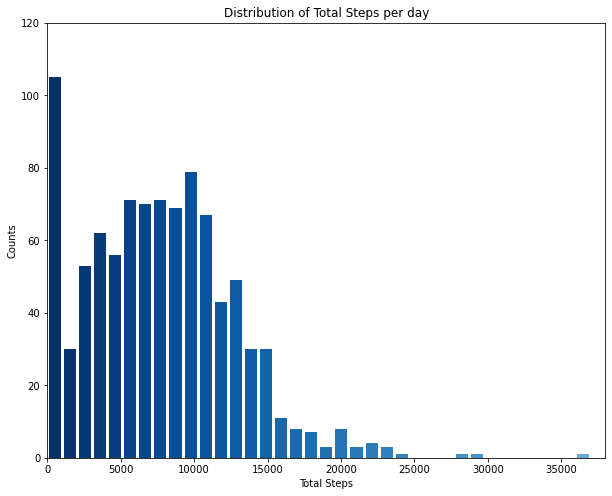

In [56]:
x = cleaned_dailyActivity_df.TotalSteps
bins = np.linspace(0, 38000, 38)

plt.figure(figsize = (10,8))
n, bins, patches = plt.hist(x, bins, align='mid', rwidth=0.8, color = 'royalblue')

color_map('Blues',2, True)

plt.xlim(0,38000)
plt.ylim(0,120)
plt.xlabel("Total Steps")
plt.ylabel("Counts")
plt.title('Distribution of Total Steps per day')
plt.show()

Most of the total steps are between 5000 to 10000 and we can observe a obvious drop after 10000 total steps.

Then we also find out the distribution of average total steps for the 33 differenct users and plot a histogram for that.

In [57]:
query = '''
    SELECT
        DISTINCT Id,
        ROUND(AVG(TotalSteps),2) AS Avg_total_steps
    FROM
        dailyActivity_Merged
    GROUP BY
        Id
    ORDER BY
        Avg_total_steps DESC;
'''

avg_total_steps = pd.read_sql(query, con)
avg_total_steps.head()

,Id,Avg_total_steps
0,8877689391,16040.03
1,8053475328,14763.29
2,1503960366,12520.63
3,2022484408,11370.65
4,7007744171,11323.42


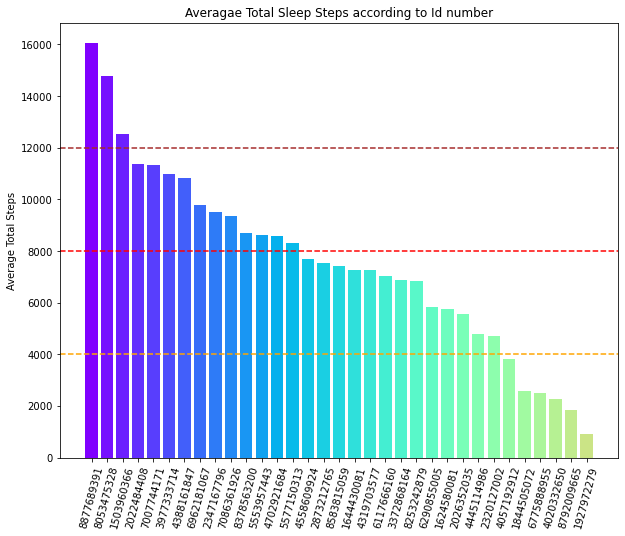

In [58]:
x = list(map(str, avg_total_steps.Id))
y = avg_total_steps.Avg_total_steps
thresold1 = 4000
thresold2 = 8000
thresold3 = 12000

cmap=cm.get_cmap('rainbow')
colors=[]
for i in x:
    colors.append(cmap(x.index(i)/len(x)/1.5))

plt.figure(figsize = (10,8))
plt.bar(x, y, color=colors)
plt.axhline(thresold1, color = 'orange', ls='--')
plt.axhline(thresold2, color = 'red', ls='--')
plt.axhline(thresold3, color = 'brown', ls='--')

plt.xticks(rotation = 75)
plt.ylabel('Average Total Steps')
plt.title('Averagae Total Sleep Steps according to Id number')
plt.show()

According to __["Higher Daily Step Count Linked with Lower All-cause Mortality"](https://www.cdc.gov/media/releases/2020/p0324-daily-step-count.html)__ released on 2020 by **Centers of Disease Control and Prevention (CDC)**, *"compared with taking 4,000 steps per day, a number considered to be low for adults, taking 8,000 steps per day was associated with a 51% lower risk for all-cause mortality (or death from all causes). Taking 12,000 steps per day was associated with a 65% lower risk compared with taking 4,000 steps."* Therefore, we set three thresold lines at 4000, 8000 and 12000 steps above. However, we just consider 4000 and 8000 total steps situation.

The above histogram shows that only 14 users have average total steps higher than 8000. 13 users have average total steps between 4000-8000 and 6 users have lower then 4000.

After looking at the total steps, we also plot the two scatter plot below:
* **Calories** agains **Very Active Minutes**
* **Calories** agains **Total Distance**

y = 2033.765 + 14.900 x + -0.129 x^2 + 0.002x^3 + -0.000x^4


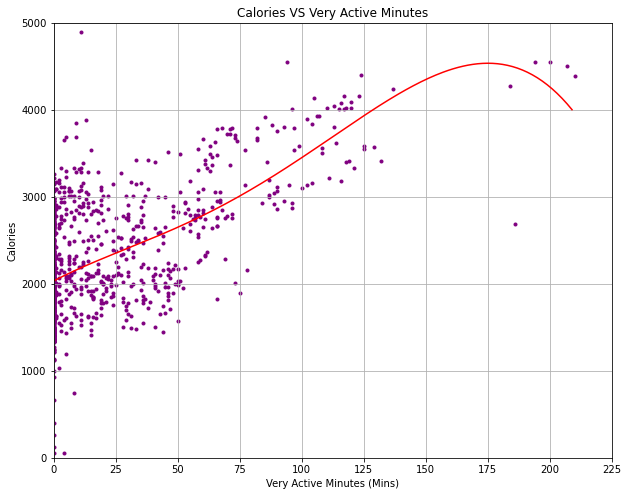

In [59]:
x = cleaned_dailyActivity_df.VeryActiveMinutes 
y = cleaned_dailyActivity_df.Calories

plt.figure(figsize = (10,8))
plt.scatter(x, y, marker='.', color ='purple')

popt, pcov = curve_fit(function, x, y)
a, b, c, d, e = popt
print ("y = %.3f + %.3f x + %.3f x^2 + %.3fx^3 + %.3fx^4" % (a, b, c, d, e))
x_line = arange(min(x), max(x), 1)
y_line = function(x_line, a, b, c, d, e)
plt.plot(x_line, y_line, color='red')

plt.xlim(0,225)
plt.ylim(0,5000)
plt.xlabel("Very Active Minutes (Mins)")
plt.ylabel("Calories")
plt.title("Calories VS Very Active Minutes")
plt.grid()

From the scatter plot, trendline and above equations, we can conclude that the relationship between **Calories** and **Very Active Minutes** are nearly linear.

y = 1672.178 + 101.969 x + 2.682 x^2 + -0.041x^3 + -0.004x^4


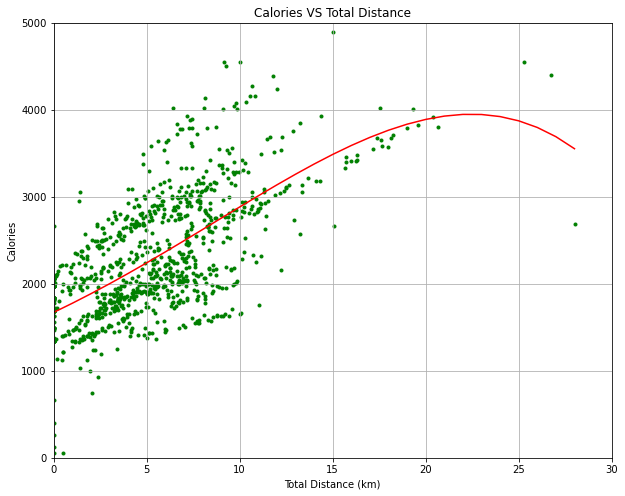

In [60]:
x = cleaned_dailyActivity_df.TotalDistance
y = cleaned_dailyActivity_df.Calories

plt.figure(figsize = (10,8))
plt.scatter(x, y, marker='.', color ='green')

popt, pcov = curve_fit(function, x, y)
a, b, c, d, e = popt
print ("y = %.3f + %.3f x + %.3f x^2 + %.3fx^3 + %.3fx^4" % (a, b, c, d, e))
x_line = arange(min(x), max(x), 1)
y_line = function(x_line, a, b, c, d, e)
plt.plot(x_line, y_line, color='red')

plt.xlim(0,30)
plt.ylim(0,5000)
plt.xlabel("Total Distance (km)")
plt.ylabel("Calories")
plt.title("Calories VS Total Distance")
plt.grid()

From the scatter plot, trendline and above equations, we can conclude that the relationship between **Calories** and **Total Distance** are nearly linear.

We then also plot a histogram to show the distribution of total distance per day.

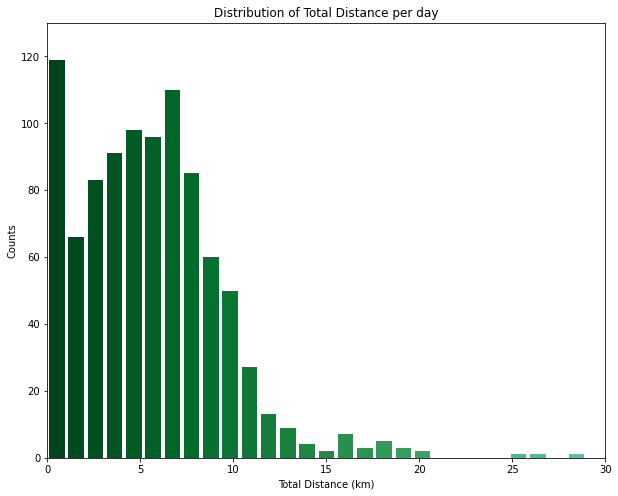

In [61]:
x = cleaned_dailyActivity_df.TotalDistance
bins = np.linspace(0, 30, 30)

plt.figure(figsize = (10,8))
n, bins, patches = plt.hist(x, bins, align='mid', rwidth=0.8, color = 'green')

color_map('BuGn', 2, True)

plt.xlim(0,30)
plt.ylim(0,130)
plt.xlabel("Total Distance (km)")
plt.ylabel("Counts")
plt.title('Distribution of Total Distance per day')
plt.show()

Most of the total distance are between 5km to 8km and we can observe a obvious drop after 8km.

In daily activity table, there are three kindly of measures in activity level with according time the users spent:
* Very Active Minutes
* Failly Active Minutes
* Lightly Active Minutes
A histogram show the distribution of the above data together is plotted as below:

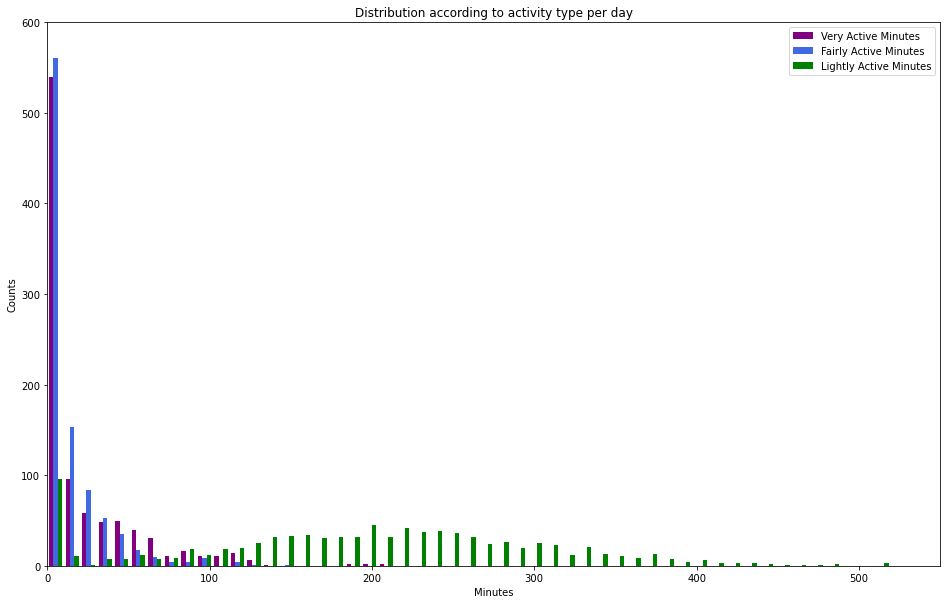

In [62]:
v = cleaned_dailyActivity_df.VeryActiveMinutes
f = cleaned_dailyActivity_df.FairlyActiveMinutes
l = cleaned_dailyActivity_df.LightlyActiveMinutes
bins = np.linspace(0, 550, 55)
colors = ['purple', 'royalblue', 'green']
labels = ['Very Active Minutes', 'Fairly Active Minutes', 'Lightly Active Minutes']

plt.figure(figsize = (16,10))
plt.hist([v,f,l], bins, color = colors, label = labels)

plt.xlim(0,550)
plt.ylim(0,600)
plt.legend(loc = 'upper right')
plt.xlabel("Minutes")
plt.ylabel("Counts")
plt.title('Distribution according to activity type per day')
plt.show()

As expected, we can observe that **Very Active Minutes** is in a shorter times compare with **Fairly Active Minutes** and **Lightly Active Minutes**. As we know that strenuous activity is more important to affect the calories burnt, we take a closer look on that part of datas.

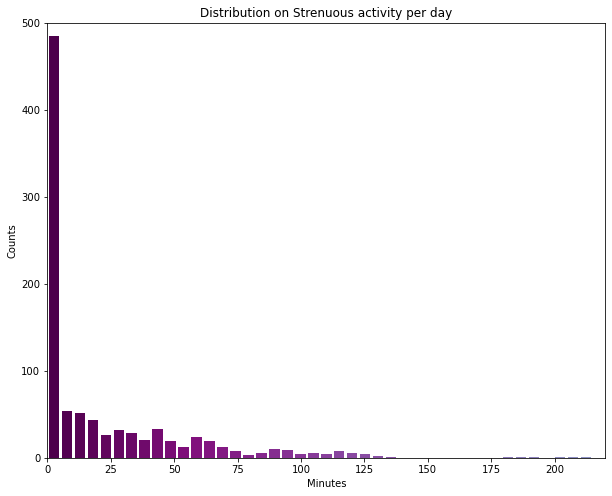

In [63]:
v = cleaned_dailyActivity_df.VeryActiveMinutes
bins = np.linspace(0, 220, 44)

plt.figure(figsize = (10,8))
n, bins, patches = plt.hist(v, bins, rwidth=0.8)

color_map('BuPu',2 ,True)

plt.xlim(0,220)
plt.ylim(0,500)
plt.xlabel("Minutes")
plt.ylabel("Counts")
plt.title('Distribution on Strenuous activity per day')
plt.show()

The above histogram shows the distribution on strenuous activity per day according to the **Very Active Minutes** data. We can observe that most of the users do not perform any strenuous activity.

In opposite, we also look at the distribution of **Sedentary Minutes** per day. Please note that **1440** minutes (24 hours) is the highest value.

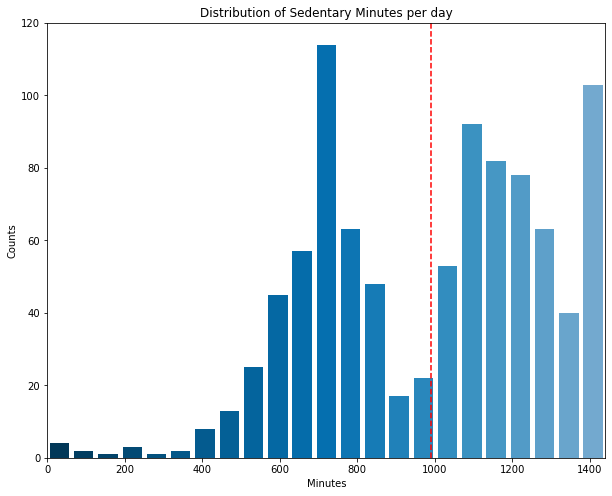

In [64]:
v = cleaned_dailyActivity_df.SedentaryMinutes
bins = np.linspace(0, 1440, 24)
thresold = 989.29
# Average Sedentary Minutes calculated above

plt.figure(figsize = (10,8))
n, bins, patches = plt.hist(v, bins, rwidth=0.8)
plt.axvline(x=thresold, color='red', ls='--')

color_map('PuBu', 2,True)

plt.xlim(0,1440)
plt.ylim(0,120)
plt.xlabel("Minutes")
plt.ylabel("Counts")
plt.title('Distribution of Sedentary Minutes per day')
plt.show()

The data shows that there are two grops range which highest value. We can then plot the distribution of average sedentary minutes according to different users to take a look.

In [65]:
query = '''
    SELECT
        DISTINCT Id,
        ROUND(AVG(SedentaryMinutes),2) AS Avg_sedentary_minutes
    FROM
        dailyActivity_Merged
    GROUP BY
        Id
    ORDER BY
        Avg_sedentary_minutes DESC;
'''

avg_sedentary_minutes = pd.read_sql(query, con)
avg_sedentary_minutes.head()

,Id,Avg_sedentary_minutes
0,1927972279,1317.42
1,6775888955,1299.42
2,8253242879,1278.89
3,8583815059,1261.47
4,1624580081,1257.74


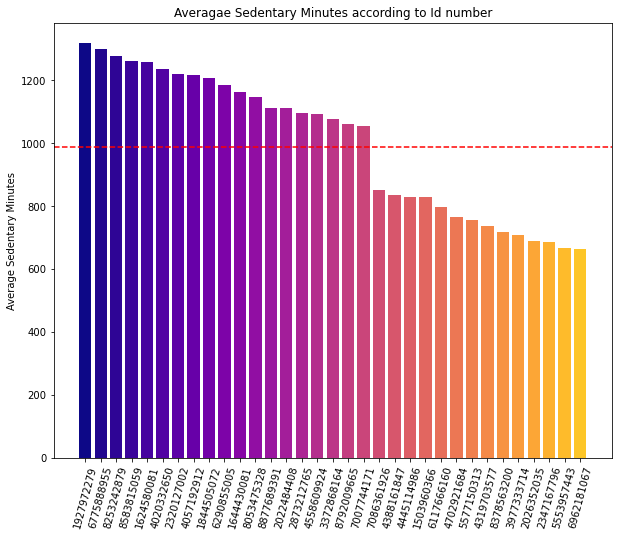

In [66]:
x = list(map(str, avg_sedentary_minutes.Id))
y = avg_sedentary_minutes.Avg_sedentary_minutes
thresold = 989.29
# Average sedentary minutes calculated above

cmap=cm.get_cmap('plasma')
colors=[]
for i in x:
    colors.append(cmap(x.index(i)/len(x)/1.1))

plt.figure(figsize = (10,8))
plt.bar(x, y, color=colors)
plt.axhline(thresold, color = 'red', ls='--')

plt.xticks(rotation = 75)
plt.ylabel('Average Sedentary Minutes')
plt.title('Averagae Sedentary Minutes according to Id number')
plt.show()

We can conclude that there are 14 users with the average sedentary minutes obvioursly lower than the average and the other 19 users is higher than the average. The two groups of different data show that there are two groups of users that we can conlude part of then are *active* compare with the other part of them.

## Sleep habits

Besides daily activity, we also plot distribtuion of total sleep minutes to observe the pattern.

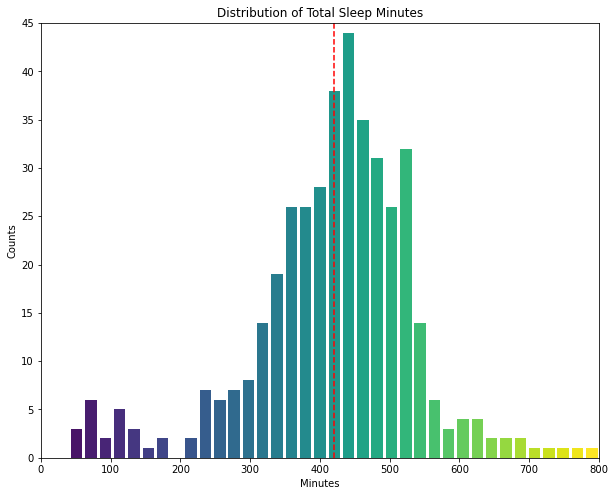

In [67]:
x = cleaned_sleepday_df.TotalMinutesAsleep
bins = np.linspace(0, 800, 40)
thresold=420

plt.figure(figsize = (10,8))
n, bins, patches = plt.hist(x, bins, rwidth=0.8)
plt.axvline(x=thresold, color='red', ls='--')

color_map('viridis', 1, False)

plt.xlim(0,800)
plt.ylim(0,45)
plt.xlabel("Minutes")
plt.ylabel("Counts")
plt.title('Distribution of Total Sleep Minutes')
plt.show()

According to the __["How Much Sleep Do I Need?"](https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html)__ from CDC recommendation, an adult should get 7 or more hours of sleep per day. Therefore we set the tresold for 420 minutes(7 hours) which repensent as a red dotted line above. We can observe that more than half of the data is higher than the thresold line. We can obtain a exact data below.

In [68]:
query ='''
    SELECT
        COUNT(Id) AS Total_counts,
        COUNT(CASE WHEN TotalMinutesAsleep>=420 THEN Id END) AS Enough_sleep,
        COUNT(CASE WHEN TotalMinutesAsleep<420 THEN Id END) AS Not_enough_sleep
    FROM
        sleepDay_Merged;
'''

df = pd.read_sql(query, con)
df

,Total_counts,Enough_sleep,Not_enough_sleep
0,413,231,182


From the above data, we can see 231 rows data have more than 7 hours sleeping time with total counts of rows are 413.

We then also plot the histogram for the 24 different users in the sleep data table as below:

In [69]:
query = '''
    SELECT
        DISTINCT Id,
        ROUND(AVG(TotalMinutesAsleep),2) AS Avg_total_sleep
    FROM
        sleepDay_Merged
    GROUP BY
        Id
    ORDER BY
        Avg_total_sleep DESC;
'''

avg_total_sleep = pd.read_sql(query, con)
avg_total_sleep.head()

,Id,Avg_total_sleep
0,1844505072,652.00
1,2026352035,506.18
2,6117666160,478.78
3,4319703577,476.65
4,5553957443,463.48


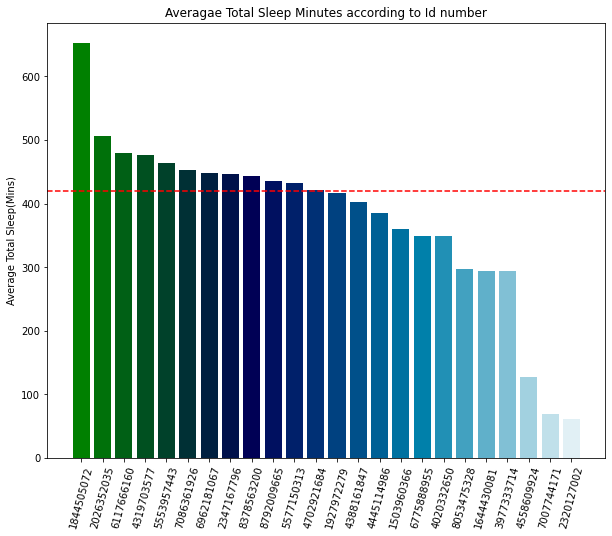

In [70]:
x = list(map(str, avg_total_sleep.Id))
y = avg_total_sleep.Avg_total_sleep
thresold = 420

cmap=cm.get_cmap('ocean')
colors=[]
for i in x:
    colors.append(cmap(x.index(i)/len(x)))

plt.figure(figsize = (10,8))
plt.bar(x, y, color=colors)
plt.axhline(thresold, color = 'red', ls='--')

plt.xticks(rotation = 75)
plt.ylabel('Average Total Sleep(Mins)')
plt.title('Averagae Total Sleep Minutes according to Id number')
plt.show()

From the above distribution, we can observe that half of the users have enough sleep. However, we also noted that three of the users have very low average total sleep time which indicates that the total sleep time should not be accurately logged by these three users.

We also plot a bar chart for the total sleep time according to weekdays.

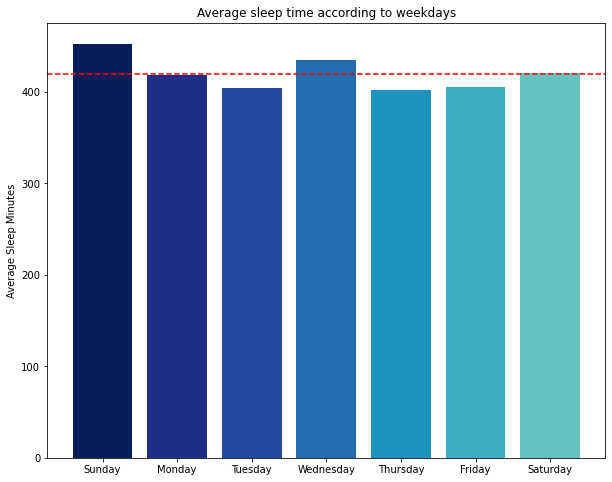

In [71]:
weekday = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
y = avg_sleep.Avg_sleep_hours
thersold = 420

cmap=cm.get_cmap('YlGnBu')
colors=[]
for i in weekday:
    colors.append(cmap(1-((weekday.index(i)/len(weekday))/1.5)))

plt.figure(figsize = (10,8))
plt.bar(weekday,y, color = colors)
plt.axhline(thresold, color = 'red', ls='--')

plt.ylabel('Average Sleep Minutes')
plt.title('Average sleep time according to weekdays')
plt.show()

Obviously most of the users have more rest in Sunday!

We are also interested in how long they awaken in bed. We plot the bar chart below. 

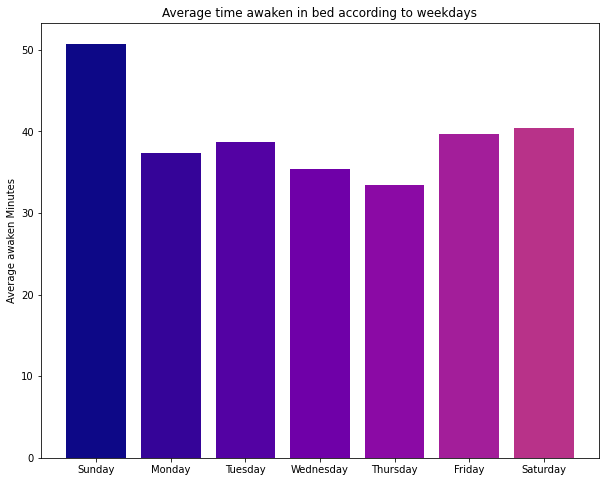

In [72]:
weekday = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
y = avg_sleep.Avg_time_awaken_in_bed

cmap=cm.get_cmap('plasma')
colors=[]
for i in weekday:
    colors.append(cmap(((weekday.index(i)/len(weekday))/2)))

plt.figure(figsize = (10,8))
plt.bar(weekday,y, color = colors)

plt.ylabel('Average awaken Minutes')
plt.title('Average time awaken in bed according to weekdays')
plt.show()

There are over 50 minutes average awaken time in Sunday which is relatively high compare with the other weekdays.

# Share

We now have our analysis and found out some interesting pattern above. We can try to share our findings from the data as below. 

Here are our findings and all the plot are produced from the above analysis process.

1. There is linear relationship between caloris burnt and total steps per day.

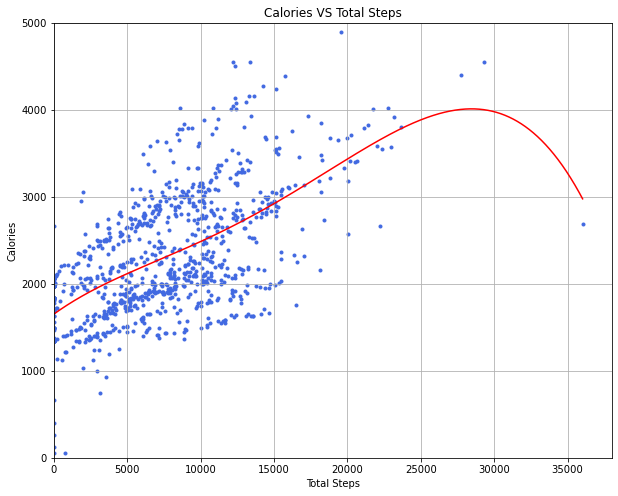

2. Both of the total steps per users are the 4000-12000. In fact, higher than 8000 steps is a better recommendation according to CDC.

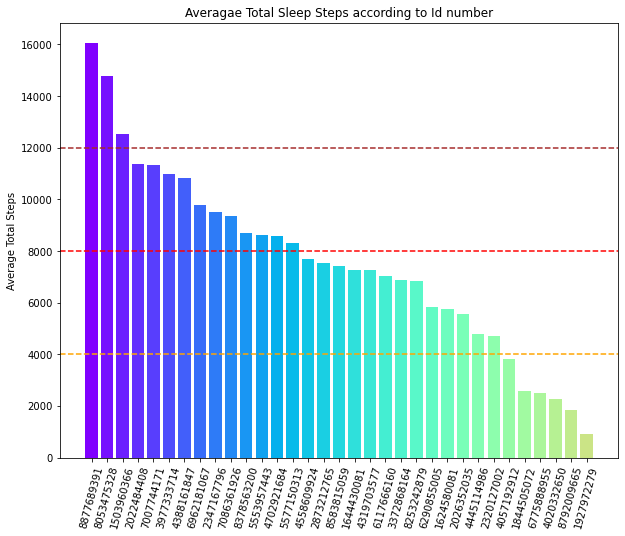

3. Sedentary minutes per day is quite long. Motivation for more exercies is recommended.

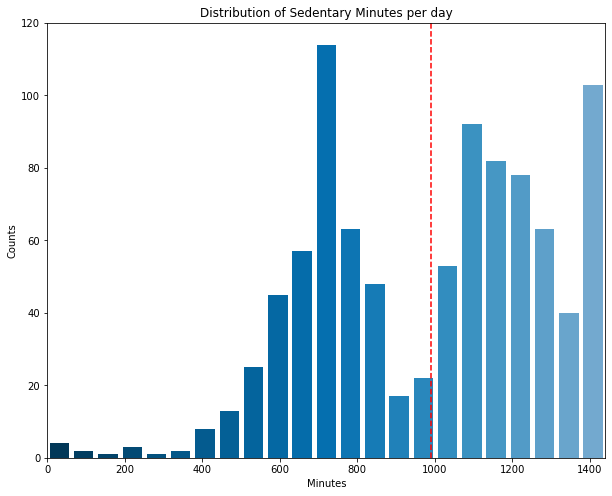

4. There are more then half of the users have a sedentary minutes higher than average.

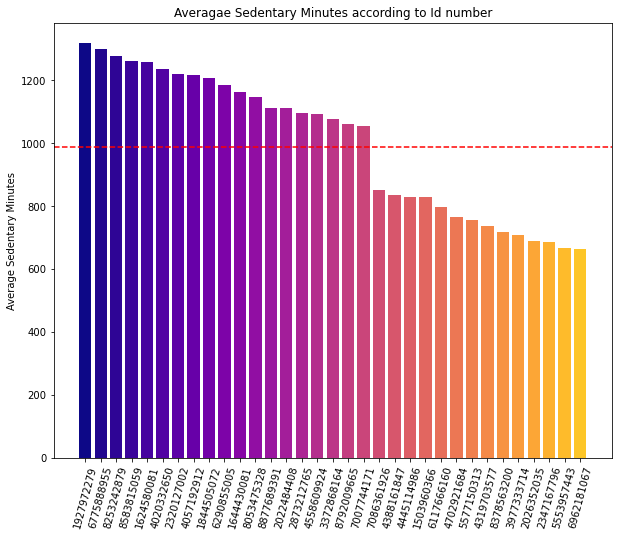

5. Most of the sleep hours is around 440 minutes per day which is higher than the 420 minutes (7 hours) as recommended.

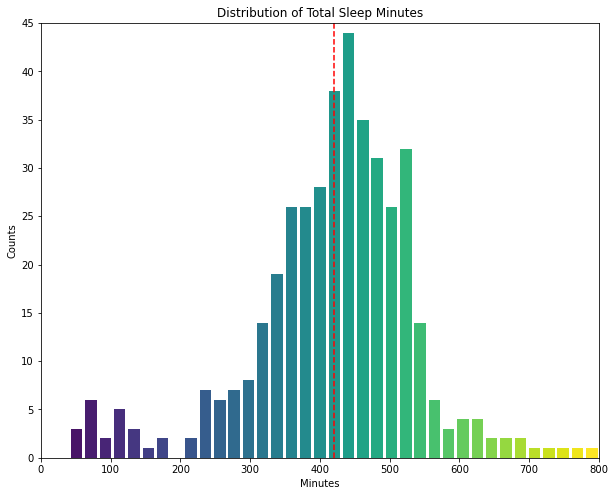

6. Distruibution of users averady data shows that only half of the users have sleep more than 7 hours.

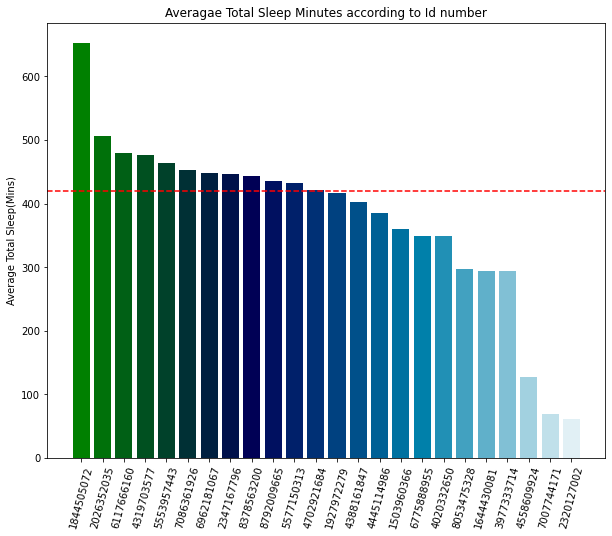

# Act

With the above analysis, we suggested that the data analysis with the Fitbit data only with 33 users in daily activity and 24 users in sleep seems not enough. Also, the above data do not include and sex information and age information. **Bellabeat** products are focus on women so it is not sure that the above data shall be consistent to company's situation. Collecting the data from existing users of **Bellabeat** products in a larger sample size is recommended to get a better result.

However, we could still observe the above data to provide some useful informaiton and interesting findings. Based on the above findings, we have the follwoing marketing strategy suggestion:
1. **Bellabeat** could provide discount or membership extend for those customers that achieve a certain goal every day, like a recommendation of 8000 steps and 7 hours sleep per day. That's can both motivate our customers to maintain good health lifestyle and also focus on th use of **Bellabeat** apps and other coming new products.
2. **Bellabeat** could also connects their apps to some other brand of smart wellness products to enlarge the number of users. Lifestyle recommendation could provide to the other brand's users and analysis for their daily activity also. That can increase the usage of the apps, get a better sample of data for the market and furture analysis of market strategy on new products.
3. **Bellabeat** could develop a new team to contact with customers with membership that have unhealthy lifestyle  to communicate with them if they have certain problems during the use of products and encourage them to have a better lifestyle with health recommendation.

Besides, we have the following recommendations in exisitng **Bellabeat** products:
1. From above data, we can conclued that there is a linear relatioship between calories burned and daily activity (Total Steps and Total Distance). Our existing products the Bellabeat app, Leaf and Time can help to lock the data. However, set up recommendations for total steps per day in different levels to encourage adults to take more steps could be useful.
2. The sedentary minutes are too hight for most of the users. Suggestion and recommendation for users to move and walk around every hours if the systems sense that the user don't move for a long period of time could be included in the apps.
3. Regarding to sleep habits, give a clear recommendations of sleep for over than 7 hours every day can be added in to the apps. Our product can also developed to lock more details in sleep and stress level combined with heart rate to provide more healthful information to the users.
4. No data and details for analysis hydration level. We recommend to collect our own data from **Bellabeat** Spring product to have a insight for that.

## Thank you for reading my project!